**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

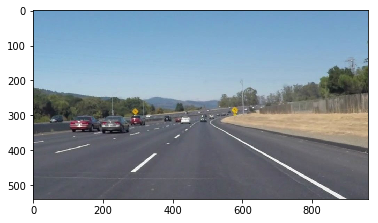

In [2]:
img = mpimg.imread('test.jpg')
plt.imshow(img)

### Test OpenCV

In [3]:
import cv2

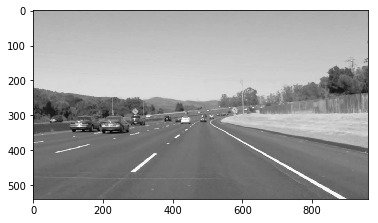

In [4]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='Greys_r')

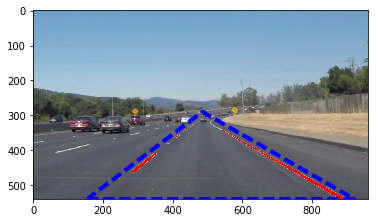

In [28]:
ysize = img.shape[0]
xsize = img.shape[1]
color = np.copy(img)
line = np.copy(img)

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

left_bottom = [155, 540]
right_bottom =[920,540]
apex = [485, 290]

fit_left = np.polyfit((left_bottom[0], apex[0]),(left_bottom[1], apex[1]),1)
fit_right = np.polyfit((right_bottom[0], apex[0]),(right_bottom[1], apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]),(left_bottom[1], right_bottom[1]),1)


color_thresholds = (img[:,:,0] < rgb_threshold[0]) | \
                    (img[:,:,1] < rgb_threshold[1]) | \
                    (img[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(img)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color)
plt.imshow(line)

## Test TensorFlow

In [29]:
import tensorflow as tf

In [30]:
with tf.Session() as sess:
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    # Should be 3
    print("1 + 2 = {}".format(sess.run(c)))

1 + 2 = 3


## Test Moviepy

In [31]:
# Import everything needed to edit/save/watch video clips
import imageio
imageio.plugins.ffmpeg.download()

from moviepy.editor import VideoFileClip
from IPython.display import HTML

Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

In [32]:
new_clip_output = 'test_output.mp4'
test_clip = VideoFileClip("test.mp4")
new_clip = test_clip.fl_image(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2YUV)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


100%|██████████| 251/251 [00:08<00:00, 31.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 

CPU times: user 13.2 s, sys: 224 ms, total: 13.4 s
Wall time: 8.78 s


In [33]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))